# Data analysis

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

In [9]:
wanted_directories = ["REWARD_WINDOW"]

In [10]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_cut = {}
data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_cut"):   
            filepath = os.path.join(directory, filename)
            data_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_nocut"):
            filepath = os.path.join(directory, filename)
            data_no_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_cut.keys())
print(data_no_cut.keys())
print(parameter_values)

ANNEALING_MID
REWARD_WINDOW
RA_SIG_SLOPE
TARGET_WIDTH
RA_NOISE
N_BG_CLUSTERS
ANNEALING
LEARNING_RATE_HL
ANNEALING_SLOPE
BG_NOISE
N_DISTRACTORS
plots
ANNEALING_MID_DECAY
JUMP_MID
JUMP_SLOPE
WEIGHT_JUMP
LEARNING_RATE_RL
BG_SIG_SLOPE
dict_keys(['ANNEALING_MID', 'REWARD_WINDOW', 'RA_SIG_SLOPE', 'ANNEALING', 'ANNEALING_MID_DECAY', 'JUMP_MID', 'JUMP_SLOPE', 'WEIGHT_JUMP', 'BG_SIG_SLOPE'])
dict_keys(['ANNEALING_MID', 'REWARD_WINDOW', 'RA_SIG_SLOPE', 'ANNEALING', 'ANNEALING_MID_DECAY', 'JUMP_MID', 'JUMP_SLOPE', 'WEIGHT_JUMP', 'BG_SIG_SLOPE'])
{'ANNEALING_MID': array([3., 2., 4., 1.]), 'REWARD_WINDOW': array([5.]), 'TARGET_WIDTH': array([0.1, 0.2, 0.3, 0.5, 0.7]), 'RA_NOISE': array([0.01, 0.02, 0.05, 0.1 , 0.  ]), 'N_BG_CLUSTERS': array([10.,  2.]), 'ANNEALING': array([0., 1.]), 'LEARNING_RATE_HL': array([1.e-04, 0.e+00, 1.e-05, 2.e-05, 5.e-05]), 'ANNEALING_SLOPE': array([1., 2., 3., 4., 5., 6.]), 'BG_NOISE': array([0.05, 0.1 , 0.2 , 0.3 , 0.5 ]), 'N_DISTRACTORS': array([10., 20.,  5., 50.]), '

In [11]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [12]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

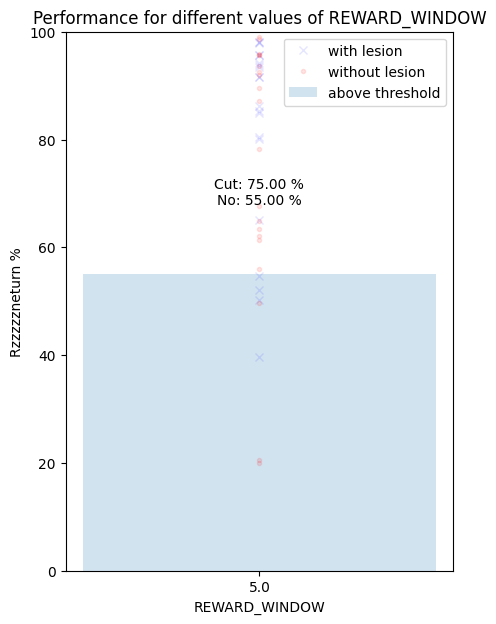

In [13]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(5,7))
        means = 100*above_threshold_no_cut#np.mean(returns_cut, axis=0)

        std = np.std(returns_cut, axis=0)
        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), means, label='above threshold', alpha=0.2, width=0.5)
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.1, color='b', label="with lesion")
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.1, color='r', label="without lesion")
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Rzzzzzneturn %')
        plt.legend()
        plt.show()


In [14]:
array = np.array(range(20))
print(array)
print(array[-10:-5])        
# 192 559 629 684 835

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14]
